# Mini example of keyword selection

In [1]:
from src.keyword_generator_2 import KeywordGenerator
import os
import pathlib

from dotenv import load_dotenv, find_dotenv
from openai import OpenAI

import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
import numpy as np

In [2]:
kw_generator = KeywordGenerator(model='gpt-3.5-turbo')

In [3]:
w0 = 'cancer'
n0 = 40
n1 = 100
key_list = []
keys = kw_generator.get_kwds(w0,n0)
key_list.append(keys)
kw_list = keys.replace("{","").replace("}","").replace("\n  ","").replace("\n ","").replace("\n","").replace(", ",",").split(',')
kwds_dict = {}
kwds_dict_s = {}
for w in kw_list:
    w_sp = w.split(":")
    kwds_dict[w_sp[0]] = int(w_sp[1])
    short = (w_sp[0]).replace(" ","").replace("-","")
    kwds_dict_s[short] = int(w_sp[1])
kwds = [kwds_dict]
kwds_s = [kwds_dict_s]


for w in kwds[0].keys():
    keys = kw_generator.get_kwds(w,n1)
    key_list.append(keys)
    kw_list = keys.replace("{","").replace("}","").replace("\n  ","").replace("\n ","").replace("\n","").replace(", ",",").split(',')
    print(kw_list)
    kwds_dict = {w:0}
    w_s = w.replace(" ","").replace("-","")
    kwds_dict_s = {w_s:0}

    for w1 in kw_list:
        w1_sp = w1.split(":")
        print(w1_sp)
        try:
            kwds_dict[w1_sp[0]] = int(w1_sp[1])
            short = (w1_sp[0]).replace(" ","").replace("-","")
            kwds_dict_s[short] = int(w1_sp[1])
        except Exception as e:
            print("An error occurred:", e)
            continue 
    kwds.append(kwds_dict)
    kwds_s.append(kwds_dict_s)
kwds[0] = {**{w0:0},**kwds[0]}
w0_s = w0.replace(" ","").replace("-","")
kwds_s[0] = {**{w0_s:0},**kwds_s[0]}

['cancer: 5', 'malignant: 4', 'benign: 4', 'oncology: 4', 'metastasis: 4', 'biopsy: 3', 'treatment: 3', 'cells: 3', 'mutation: 3', 'radiation: 3', 'chemotherapy: 3', 'diagnosis: 3', 'prognosis: 3', 'tissue: 3', 'growth: 3', 'symptoms: 3', 'genetics: 3', 'risk: 3', 'prevention: 3', 'surgery: 3', 'immune: 3', 'therapy: 3', 'carcinoma: 3', 'melanoma: 3', 'lymphoma: 3', 'leukemia: 3', 'screening: 3', 'stage: 3', 'invasion: 3', 'markers: 3', 'tumor suppressor: 3', 'angiogenesis: 3', 'proliferation: 3', 'biomarkers: 3', 'prostate: 3', 'breast: 3', 'lung: 3', 'colon: 3', 'pancreatic: 3', 'ovarian: 3', 'brain: 3', 'liver: 3', 'skin: 3', 'cervical: 3', 'bladder: 3', 'sarcoma: 3', 'lymph nodes: 3', 'hormone: 3', 'receptor: 3', 'targeted therapy: 3', 'precision medicine: 3', 'immunotherapy: 3', 'clinical trials: 3', 'side effects: 3', 'survival rate: 3', 'remission: 3', 'recurrence: 3', 'palliative care: 3', 'quality of life: 3', 'patient care: 3', 'research: 3', 'drug development: 3', 'radiology

In [4]:
w1

'end-of-life care affordability: 3'

In [5]:
kwds_s,kwds

([{'cancer': 0,
   'tumor': 5,
   'oncology': 4,
   'chemotherapy': 4,
   'radiation': 4,
   'metastasis': 4,
   'diagnosis': 4,
   'treatment': 4,
   'prognosis': 4,
   'research': 3,
   'genetics': 3,
   'mutation': 3,
   'prevention': 3,
   'immunotherapy': 3,
   'surgery': 3,
   'biomarkers': 3,
   'clinicaltrials': 3,
   'screening': 3,
   'riskfactors': 3,
   'survivalrate': 3,
   'sideeffects': 3,
   'palliativecare': 3,
   'earlydetection': 3,
   'lifestyle': 2,
   'environmentalfactors': 2,
   'targetedtherapy': 2,
   'precisionmedicine': 2,
   'caregiver': 2,
   'supportgroups': 2,
   'copingstrategies': 2,
   'alternativemedicine': 2,
   'hereditary': 2,
   'epidemiology': 2,
   'publichealth': 2,
   'awareness': 2,
   'fundraising': 2,
   'survivorship': 2,
   'qualityoflife': 2,
   'symptommanagement': 2,
   'endoflifecare': 2},
  {'tumor': 0,
   'cancer': 5,
   'malignant': 4,
   'benign': 4,
   'oncology': 4,
   'metastasis': 4,
   'biopsy': 3,
   'treatment': 3,
   'cel

In [11]:
count = []
for kw_dictionary in kwds_s:
    t = 'cancer' in list(kw_dictionary.keys())
    count.append(t*1.)
sum(count)

9.0

In [12]:
G = nx.DiGraph()
for kw_dict in kwds_s:
    for i,(k,v) in enumerate(kw_dict.items()):
        origin = list(kw_dict.keys())[0]
        if i>0:
            G.add_edge(origin,k,weight=v)


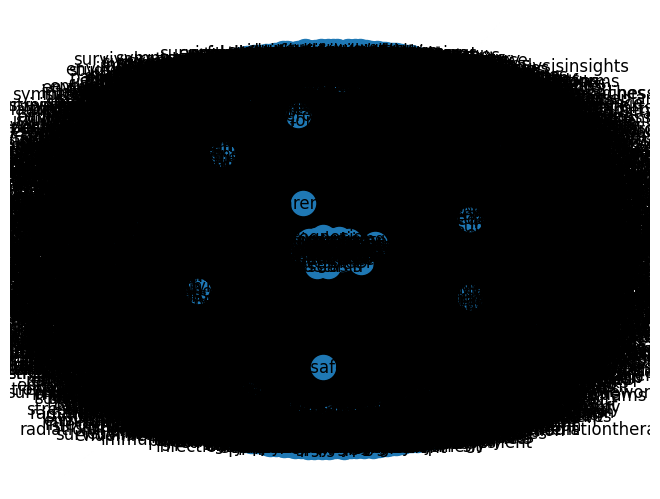

In [8]:
edge_widths = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, with_labels=True, width=edge_widths)

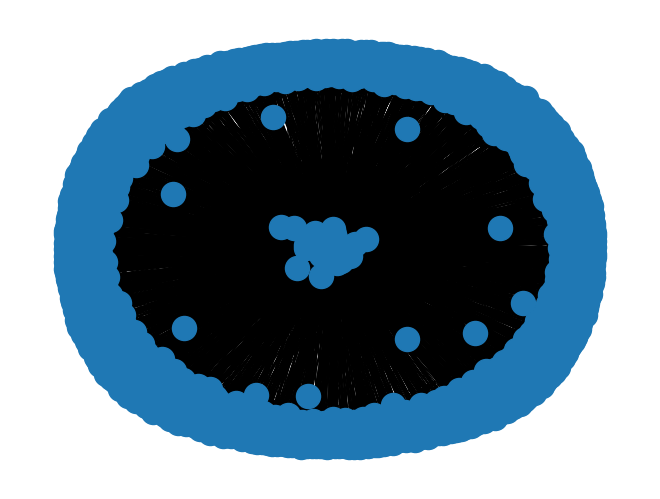

In [13]:
nx.draw(G)

In [14]:
personalization = {node: 0 for node in G.nodes()} 
personalization['cancer'] = 1 
pagerank_scores = nx.pagerank(G, personalization=personalization)

scores = pagerank_scores
sorted_scores = sorted(scores.items(), key=lambda x:x[1], reverse = True)
sorted_scores

[('cancer', 0.3828955818170309),
 ('tumor', 0.015642864920270762),
 ('treatment', 0.01361703391419496),
 ('diagnosis', 0.01338021859907731),
 ('prognosis', 0.012919921768612093),
 ('oncology', 0.012887512019132996),
 ('chemotherapy', 0.012588689506514946),
 ('radiation', 0.012497500015762343),
 ('metastasis', 0.012410239168266956),
 ('research', 0.00995036740693979),
 ('clinicaltrials', 0.009749904383363522),
 ('prevention', 0.00970678981976068),
 ('sideeffects', 0.009560549656656495),
 ('palliativecare', 0.009553313882979034),
 ('screening', 0.009535538365980317),
 ('biomarkers', 0.009521385712345348),
 ('genetics', 0.009498643224040934),
 ('riskfactors', 0.009474025439947693),
 ('surgery', 0.00942130948263147),
 ('mutation', 0.009376621016451845),
 ('survivalrate', 0.009373590378185349),
 ('immunotherapy', 0.009308817115881222),
 ('earlydetection', 0.009280645630029734),
 ('precisionmedicine', 0.00668999566825319),
 ('qualityoflife', 0.006625545347343654),
 ('publichealth', 0.0064915